In [54]:
import numpy as np 
import pandas as pd 
import os
from sklearn import neighbors,datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
main_data=pd.read_csv('/content/water_dataX.csv',encoding="ISO-8859-1")
main_data.fillna(0, inplace=True)
main_data.head(10)

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30,5.5,7.4,81,1.5,0.1,2853,4049,2014
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,29.2,6.1,6.7,308,1.4,0.3,3355,5672,2014
7,3185,RIVER MANDOVI AT AMONA BRIDGE,GOA,29.6,6.4,6.7,414,1,0.2,6073,9423,2014
8,3186,RIVER MANDOVI AT IFFI JETTY,GOA,30,6.4,7.6,305,2.2,0.1,3478,4990,2014
9,3187,RIVER MANDOVI NEAR HOTEL MARRIOT,GOA,30.1,6.3,7.6,77,2.3,0.1,2606,4301,2014


In [4]:
main_data['Temp']=pd.to_numeric(main_data['Temp'],errors='coerce')
main_data['D.O. (mg/l)']=pd.to_numeric(main_data['D.O. (mg/l)'],errors='coerce')
main_data['PH']=pd.to_numeric(main_data['PH'],errors='coerce')
main_data['B.O.D. (mg/l)']=pd.to_numeric(main_data['B.O.D. (mg/l)'],errors='coerce')
main_data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(main_data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
main_data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(main_data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
main_data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(main_data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
main_data.dtypes
#converting the data to required format

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [6]:
#initialization the data according to the model
start=2
end=1779
station=main_data.iloc [start:end ,0]
location=main_data.iloc [start:end ,1]
state=main_data.iloc [start:end ,2]
do= main_data.iloc [start:end ,4].astype(np.float64)
value=0
ph = main_data.iloc[ start:end,5]  
co = main_data.iloc [start:end ,6].astype(np.float64)   
  
year=main_data.iloc[start:end,11]
tc=main_data.iloc [2:end ,10].astype(np.float64)


bod = main_data.iloc [start:end ,7].astype(np.float64)
na= main_data.iloc [start:end ,8].astype(np.float64)
na.dtype

dtype('float64')

In [7]:
data=pd.concat([location,state,do,ph,co,bod,na,tc,year],axis=1)
data. columns = ['location','state','do','ph','co','bod','na','tc','year']

In [8]:
#normalising all the values on an fixed scale 
#calulation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))
#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))
#calc of B.D.O
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))
#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))
#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

In [11]:
#multipling with constant values to bring it to a standard scale
data['wph']=data.npH * 0.165 #water ph vales
data['wdo']=data.ndo * 0.281 #water oxygen demand
data['wbdo']=data.nbdo * 0.234 #water biological oxygenn demand
data['wec']=data.nec* 0.009 #water electrical conductivity
data['wna']=data.nna * 0.028 #water nitrite concentration
data['wco']=data.nco * 0.281 #water total coliform
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco 
#wqi is the water quality index and it determines the purity of water if the value is high than the water is least pure


In [13]:
#calculation overall wqi for each year,That is calulating the mean of the complete year.
filtered_data=data.groupby('year')['wqi'].mean()
filtered_data

year
2006    71.308824
2007    72.549000
2008    72.570943
2009    74.085193
2010    74.648723
2011    75.647013
2012    78.969041
2013    75.009425
2014    76.879588
Name: wqi, dtype: float64

In [17]:
#PLacing the above table in datastructure using index
index_fdata=filtered_data.reset_index(level=0,inplace=False)

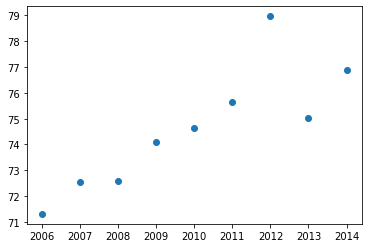

In [38]:
#scatter plot of data points
xvalue=['year']
y = index_fdata['wqi']
x=index_fdata[xvalue]

plt.scatter(x,y)
plt.show()

In [39]:
reg=linear_model.LinearRegression() ##running the linear regression with an object
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4) 
#training the model with 80 % of dataset with a random state to maintain the same rndom value for each run
#split the complete data to training set and test set to check the accuracy

In [41]:
reg.fit(x_train,y_train)
# Adding the training data to the linear model for training

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
print(reg.predict(x_test))
#Predicting the values for the test dataset which was devided

[73.86206246 74.59948715]


In [46]:
#defining the function to predict the water polution at any year 
def get_pred(x):
  arr=np.array(x);
  ar=arr.reshape(-1,1)
 

  return reg.predict(ar)[0]



In [58]:
y_predicted=reg.predict(x_test)
print('Rate of Deviation(mean square value):%.2f'%mean_squared_error(y_test,y_predicted))
#Finding the deviation between the predicted value and actual value recorded 

Rate of Deviation(root mean square value):0.03


In [83]:
y_pred=reg.predict(x)
compare_data = pd.DataFrame({'Actual': y_test, 'Predicted':y_predicted }) 

final_data=pd.DataFrame({'Actual': y, 'Predicted':y_pred }) 
final_data=pd.concat([index_fdata, final_data], axis=1)
compare_data

,Actual,Predicted
3,74.085193,73.862062
4,74.648723,74.599487


In [71]:
#Testing the accuracy of the model
print(np.sqrt(metrics.mean_squared_error(y_test,y_predicted)))

0.16157291044356104


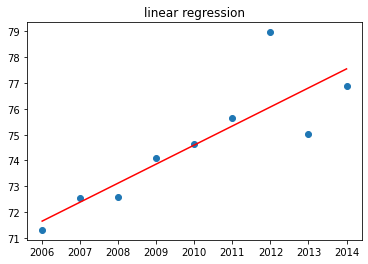

In [81]:
#plotting the actual and predicted results that is with regression line 
x_axis=final_data.year
y_axis=final_data.Actual
y1_axis=final_data.Predicted
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("linear regression")

plt.show()

In [82]:
#prdicting any year water polution rate with --input of 2020
i=int(input("Enter the year to be predicted. :"))
print("The predicted value is ")
get_pred(i)

Enter the year to be predicted. :2020
The predicted value is 


81.97373408414